# Titanic - Machine Learning from Disaster

In this paper, I will try to build a model to solve a classification problem using classical dataset — Titanic.

### Import software libraries

In [87]:
import numpy as np                     
import pandas as pd                                      
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn                         
import seaborn as sns 
import scipy.stats as stats

### Load the dataset

In [88]:
#import the dataset
df = pd.read_csv('train.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## EDA
Let's conduct an exploratory analysis of this data to select the necessary features. First, we check for duplicate and missing values, remove columns that are irrelevant to the analysis, and screen for outliers or anomalies. Later, we visualise the distribution of numerical and categorical data, the correlation between variables.

### Cleaning

In [89]:
#Check the data types
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [90]:
df.shape

(891, 12)

In [91]:
#Check the duplicate rows
df.duplicated().sum()

0

In [92]:
#Dropping irrelevant columns
df = df.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [93]:
#Checking the null values
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

We see a large number of missing values by age. We can't just delete these columns without finding out if there is a pattern among these people. 

In [94]:
df_with_na= df[df['Age'].isnull()]
df_with_na.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,177.000000,177.000000,0.0,177.000000,177.000000,177.000000
mean,0.293785,2.598870,NaN,0.564972,0.180791,22.158567
std,0.456787,0.763216,NaN,1.626316,0.534145,31.874608
min,0.000000,1.000000,NaN,0.000000,0.000000,0.000000
25%,0.000000,3.000000,NaN,0.000000,0.000000,7.750000
50%,0.000000,3.000000,NaN,0.000000,0.000000,8.050000
75%,1.000000,3.000000,NaN,0.000000,0.000000,24.150000
max,1.000000,3.000000,NaN,8.000000,2.000000,227.525000


Now let's compare it with the dataset without missing values 

In [95]:
df_with_na= df[df.notnull().all(axis=1)]
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Well, we didn't see any significant difference between these data, so we can delete the rows with the missing values.

In [96]:
#Delete rows with missing values
df.dropna(inplace=True)

In [97]:
#Checking the null values after dropna function
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

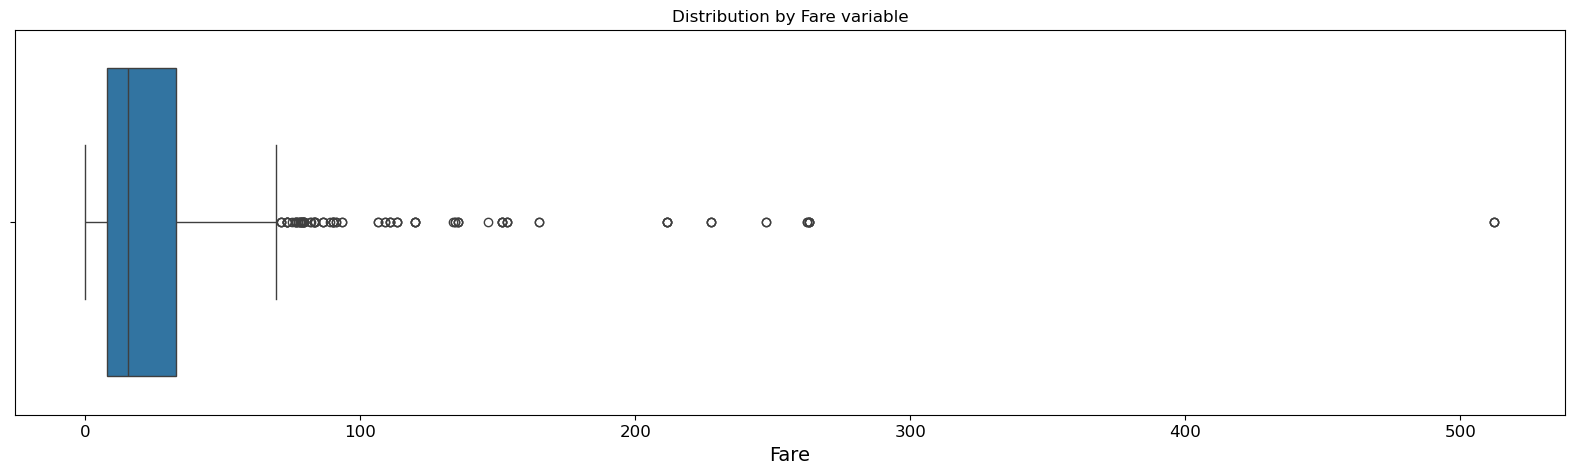

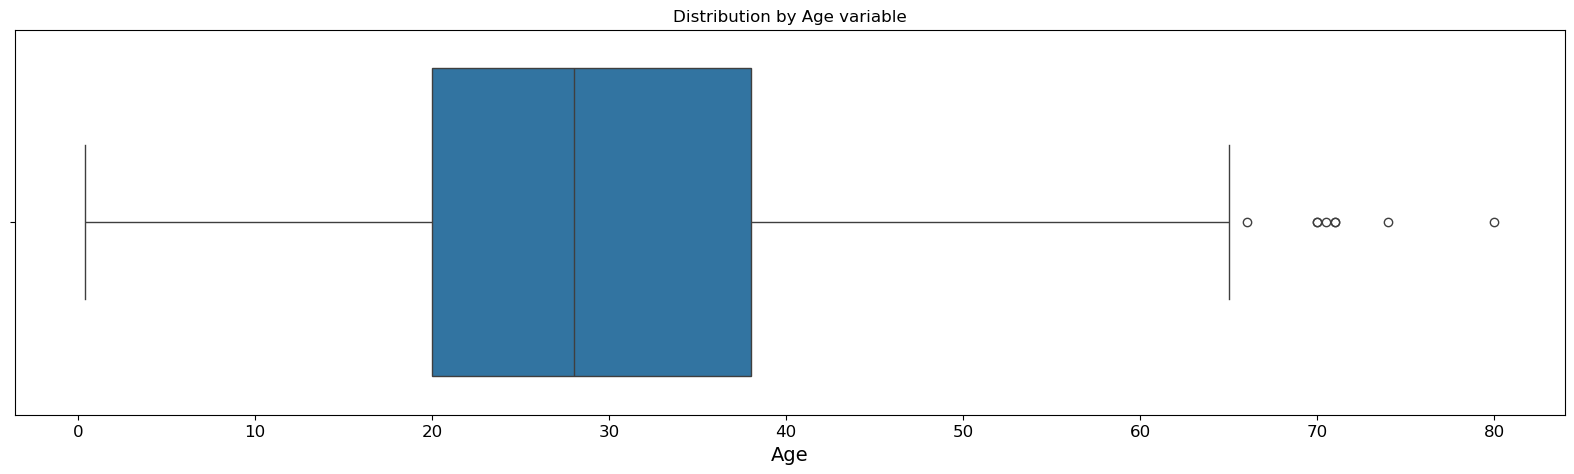

In [98]:
#Checking the outlies
for columns in ['Fare', 'Age']:
    plt.figure(figsize=(20,5))
    sns.boxplot(df, x=columns)
    plt.title(f'Distribution by {columns} variable')
    plt.show()

We can see extreme values for Fare and Age. To improve our future model, we will revisit our dataset. 

In [99]:
df = df[(df['Fare']<200) & (df['Age'] <69)]

### Visualisation of features and target

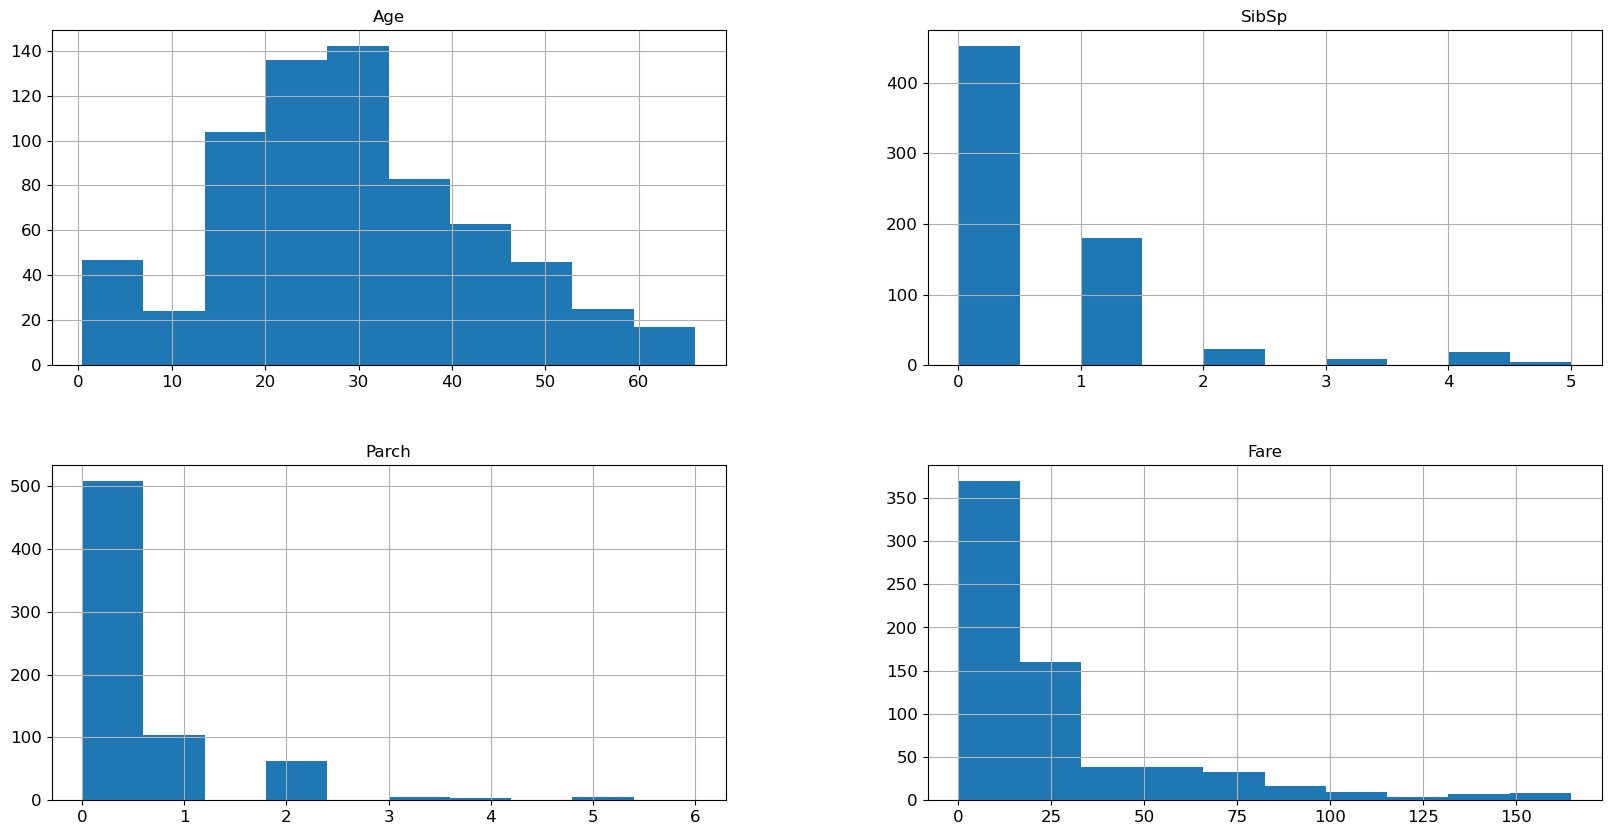

In [100]:
# Checking of the distributions
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

df[['Age','SibSp', 'Parch', 'Fare']].hist(figsize=(20,10))

plt.show()

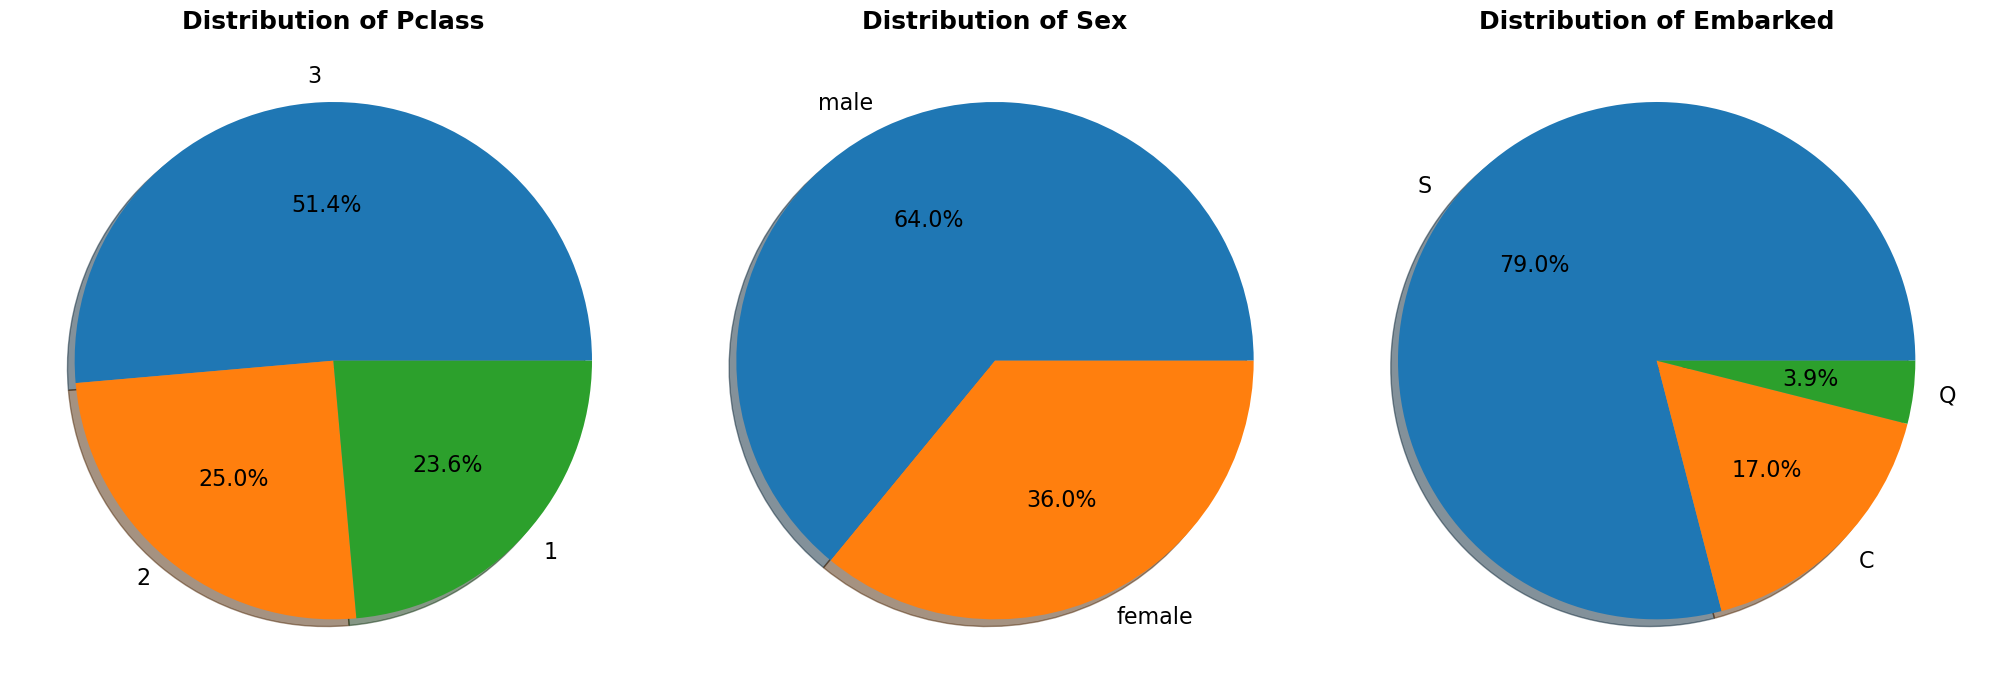

In [101]:
fig, ax = plt.subplots(1, 3, figsize=(20,10))

for i, var in enumerate(['Pclass', 'Sex', 'Embarked']):
    value_counts = df[var].value_counts()
    
    ax[i].pie(x=value_counts.values, 
    labels=value_counts.index,
    autopct='%1.1f%%',
    shadow=True,
    textprops={'fontsize': 16})
    
    ax[i].set_title(f'Distribution of {var}', fontweight='bold', fontsize=18)


plt.tight_layout() 
plt.show()

The pie chart lets us know that the majority are:  
* male;
* passengers departing from the port of Southampton;
* travelled in the cheapest class.

### Preparing data for training 

Convert categorical data into indicator data 

In [102]:
df= pd.get_dummies(df,columns=['Sex', 'Embarked']).astype('float')
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3.0,22.0,1.0,0.0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,1.0,0.0,1.0,0.0,0.0
2,1.0,3.0,26.0,0.0,0.0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1.0,1.0,35.0,1.0,0.0,53.1000,1.0,0.0,0.0,0.0,1.0
4,0.0,3.0,35.0,0.0,0.0,8.0500,0.0,1.0,0.0,0.0,1.0


Next. Let's review the correlations between the label and the features, as well as between the features to avoid multicollinearity. 

In [103]:
#For categorical data, we use the Chi-square test 
from sklearn.feature_selection import SelectKBest, chi2


selector = SelectKBest(chi2, k=2)
selector.fit_transform(df[['Pclass', 'Sex_female', 'Embarked_C', 'Embarked_Q',	'Embarked_S']], df['Survived'])

print("P-values for each feature:", selector.pvalues_)


P-values for each feature: [7.27940930e-07 2.67098513e-28 8.95825015e-06 2.83117950e-01
 6.84448577e-02]


##### We found statistically significant variables for our model:
* Pclass (p < 0.001)
* Sex_female (p < 0.001)
* Embarked_C (p < 0.001)

In [104]:
#For discrete and continuous data 
import pandas as pd
from scipy.stats import mannwhitneyu

group_0 = df[df['Survived'] == 0].drop(columns=['Survived'])
group_1 = df[df['Survived'] == 1].drop(columns=['Survived'])


p_values = {}
for column in group_0.columns:
    stat, p_value = mannwhitneyu(group_0[column], group_1[column])
    p_values[column] = p_value

# Виведемо p-значення для кожної ознаки
print("p-values for each feature:")
for feature, p_value in p_values.items():
    print(f"{feature}: {p_value}")


p-values for each feature:
Pclass: 5.628883724097561e-20
Age: 0.16895597482044855
SibSp: 0.046909545689993754
Parch: 3.358039448270885e-05
Fare: 3.722673720830135e-17
Sex_female: 3.602650224892853e-43
Sex_male: 3.602650224892853e-43
Embarked_C: 1.1071493255773267e-06
Embarked_Q: 0.27408868638251127
Embarked_S: 6.990018170238731e-05


We found statistically significant variables for our model:
* Fare (p < 0.001)
* Parch(p < 0.001)

Now let's look at the correlations between these variables.

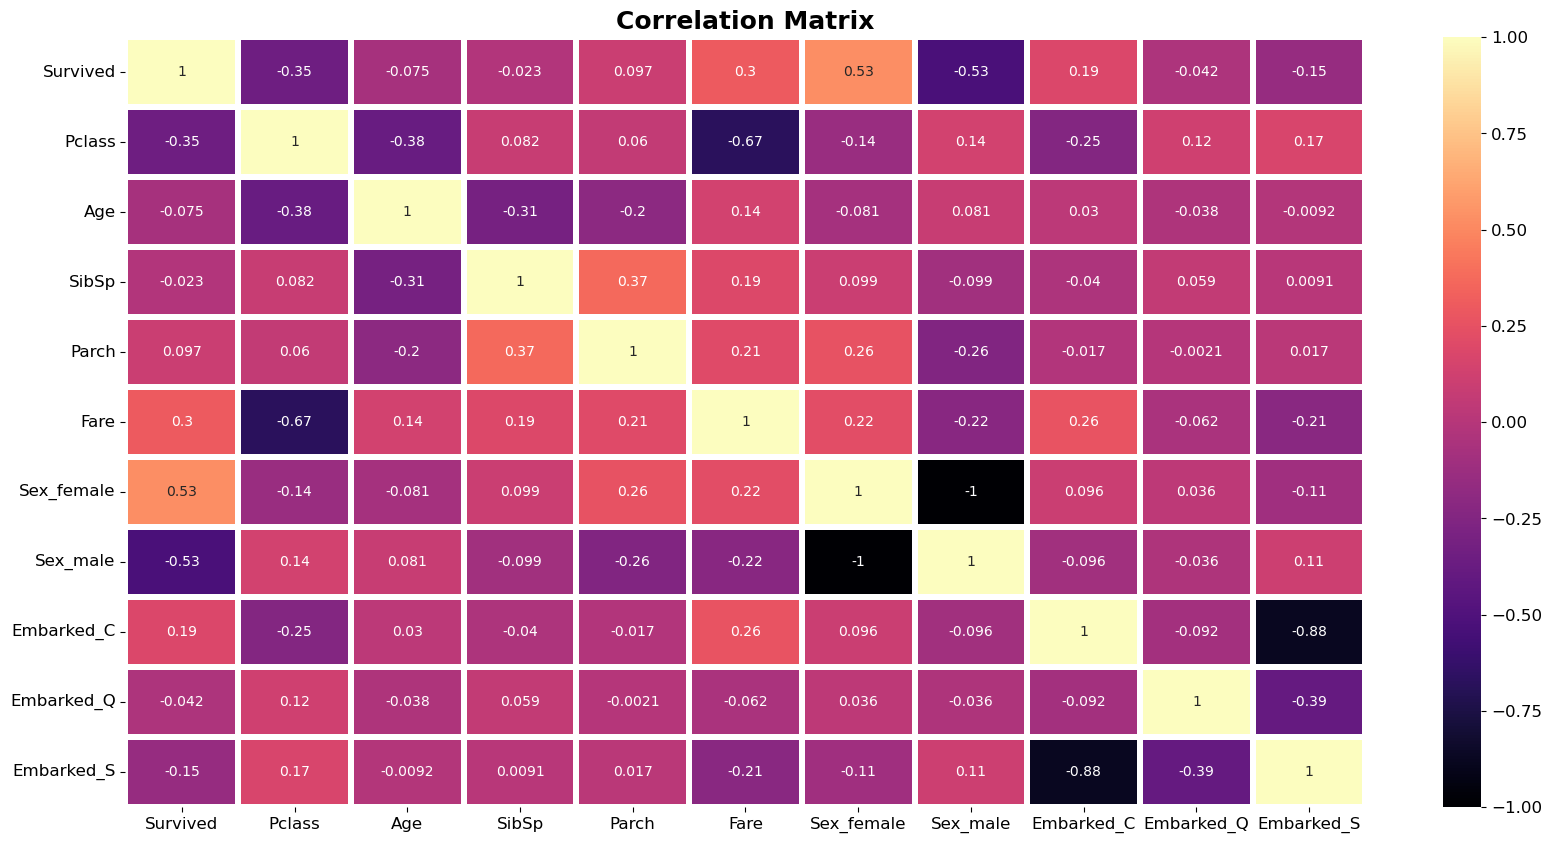

In [105]:
plt.figure(figsize=(20,10))

sns.heatmap(df.corr(), 
            annot=True, 
            cmap="magma",
            linewidths=3)

plt.title('Correlation Matrix', fontweight='bold', fontsize=18)
plt.show()

### Normalisation of data

In [106]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for columns in ['Age', 'Fare']:
    df[columns] = scaler.fit_transform(df[[columns]])

df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3.0,0.329064,1.0,0.0,0.043975,0.0,1.0,0.0,0.0,1.0
1,1.0,1.0,0.573041,1.0,0.0,0.432369,1.0,0.0,1.0,0.0,0.0
2,1.0,3.0,0.390058,0.0,0.0,0.048069,1.0,0.0,0.0,0.0,1.0
3,1.0,1.0,0.527295,1.0,0.0,0.322078,1.0,0.0,0.0,0.0,1.0
4,0.0,3.0,0.527295,0.0,0.0,0.048827,0.0,1.0,0.0,0.0,1.0


## Build and test models


In [160]:
from sklearn.model_selection import train_test_split
X = np.array(df[['Pclass', 'Sex_female', 'Embarked_C',  'Parch']])
Y = np.array(df['Survived'])

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f'The shape of the training sample is {x_train.shape}')
print(f'The shape of the test sample is {x_test.shape}')

The shape of the training sample is (549, 4)
The shape of the test sample is (138, 4)


### LogisticRegression 

In [161]:
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    log_loss, 
    confusion_matrix)

In [162]:

lr = LogisticRegression()
#We'll start with a study of the performance of different models with logistic regression 
param_grid = {'C' :[0.01, 0.1, 1, 10, 100],
              'penalty':['elasticnet'],
              'solver': ['saga'],
              'l1_ratio': [0.1, 0.5, 0.7, 1.0]
             }

grid_search_lr = GridSearchCV(estimator=lr, 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='accuracy', 
                           verbose=1)

start = datetime.now() 
grid_search_lr.fit(x_train, y_train)
end = datetime.now() 
duration = end - start

print(f'Execution time: {duration.total_seconds():.2f} seconds')
print("The best parametrs:", grid_search_lr.best_params_)
print("The best score:", grid_search_lr.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Execution time: 0.31 seconds
The best parametrs: {'C': 0.1, 'l1_ratio': 0.7, 'penalty': 'elasticnet', 'solver': 'saga'}
The best score: 0.7868557130942453


In [163]:
# Creating function of metrics
def metrics(true_y, predicted_y):
    accuracy = accuracy_score(y_test, predicted_y)
    precision = precision_score(true_y, predicted_y)
    recall = recall_score(true_y, predicted_y)
    f1 = f1_score(true_y, predicted_y)
    return np.round ([accuracy, precision, recall, f1], 2)

In [164]:
# Creating data for metrics
model_metrics = pd.DataFrame(columns=['Logistic Regression', 'Decision Tree', 'KNN', 'SVM', 'Random Forest'] , 
                             index=['Accuracy','Precision', 'Recall', 'F1'])

In [165]:
#Now let`s predict and save metrics of the model 
predicted_y = grid_search_lr.predict(x_test)

model_metrics['Logistic Regression'] = metrics(y_test, predicted_y)

model_metrics.head()

,Logistic Regression,Decision Tree,KNN,SVM,Random Forest
Accuracy,0.73,NaN,NaN,NaN,NaN
Precision,0.68,NaN,NaN,NaN,NaN
Recall,0.62,NaN,NaN,NaN,NaN
F1,0.65,NaN,NaN,NaN,NaN


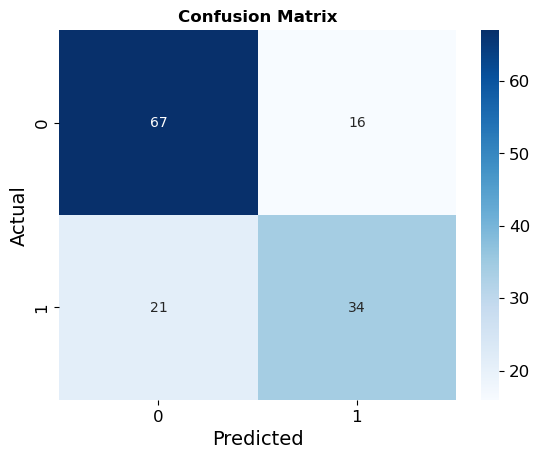

In [166]:
# Let's have a closer look at the errors of the Logistic Model 
cm = confusion_matrix(y_test,predicted_y)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix', fontweight='bold')
plt.show()

### DecisionTree

In [167]:
# Let's try to apply decision tree classifier
dtc = DecisionTreeClassifier()

param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 5, 7, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': [None, 'sqrt', 'log2']
             }

grid_search_dtc = GridSearchCV(estimator=dtc, 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='accuracy', 
                           verbose=1)

start = datetime.now() 
grid_search_dtc.fit(x_train, y_train)
end = datetime.now() 
duration = end - start

print(f'Execution time: {duration.total_seconds():.2f} seconds')
print("The best parametrs:", grid_search_dtc.best_params_)
print("The best score:", grid_search_dtc.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Execution time: 1.85 seconds
The best parametrs: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10}
The best score: 0.8033527939949959


In [168]:
predicted_y = grid_search_dtc.predict(x_test)

model_metrics['Decision Tree'] = metrics(y_test, predicted_y)

model_metrics.head()

,Logistic Regression,Decision Tree,KNN,SVM,Random Forest
Accuracy,0.73,0.73,NaN,NaN,NaN
Precision,0.68,0.82,NaN,NaN,NaN
Recall,0.62,0.42,NaN,NaN,NaN
F1,0.65,0.55,NaN,NaN,NaN


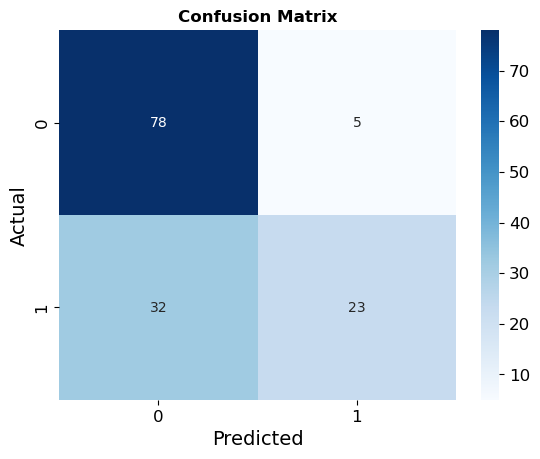

In [169]:
cm = confusion_matrix(y_test,predicted_y)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix', fontweight='bold')
plt.show()

### K-Nearest Neighbors (KNN)

In [170]:
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': [3, 5, 7, 9, 11],  # Кількість найближчих сусідів
              'weights': ['uniform', 'distance'],  # Ваги для сусідів
              'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev'],  # Метрика для обчислення відстаней
              'p': [1, 2]
             }

grid_search_knn = GridSearchCV(estimator=knn, 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='accuracy', 
                           verbose=1)

start = datetime.now() 
grid_search_knn.fit(x_train, y_train)
end = datetime.now() 
duration = end - start

print(f'Execution time: {duration.total_seconds():.2f} seconds')
print("The best parametrs:", grid_search_knn.best_params_)
print("The best score:", grid_search_knn.best_score_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Execution time: 2.21 seconds
The best parametrs: {'metric': 'minkowski', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
The best score: 0.7924270225187656


In [171]:
predicted_y = grid_search_knn.predict(x_test)

model_metrics['KNN'] = metrics(y_test, predicted_y)

model_metrics.head()

,Logistic Regression,Decision Tree,KNN,SVM,Random Forest
Accuracy,0.73,0.73,0.70,NaN,NaN
Precision,0.68,0.82,0.68,NaN,NaN
Recall,0.62,0.42,0.47,NaN,NaN
F1,0.65,0.55,0.56,NaN,NaN


### Support Vector Machine

In [172]:
svm_model = SVC()

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['poly'],
    'gamma': ['scale', 'auto', 0.1, 1],
    'degree': [2],
    'coef0': [0.1, 0.5]
}

grid_search_svc= GridSearchCV(estimator=svm_model, 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='accuracy', 
                           verbose=1)

start = datetime.now() 
grid_search_svc.fit(x_train, y_train)
end = datetime.now() 
duration = end - start

print(f'Execution time: {duration.total_seconds():.2f} seconds')
print("The best parametrs:", grid_search_svc.best_params_)
print("The best score:", grid_search_svc.best_score_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Execution time: 24.84 seconds
The best parametrs: {'C': 10, 'coef0': 0.1, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}
The best score: 0.7997164303586322


In [173]:
predicted_y = grid_search_svc.predict(x_test)

model_metrics['SVM'] = metrics(y_test, predicted_y)

model_metrics.head()

,Logistic Regression,Decision Tree,KNN,SVM,Random Forest
Accuracy,0.73,0.73,0.70,0.75,NaN
Precision,0.68,0.82,0.68,0.82,NaN
Recall,0.62,0.42,0.47,0.49,NaN
F1,0.65,0.55,0.56,0.61,NaN


### Random forest

In [176]:
rf = RandomForestClassifier()

param_grid = {'n_estimators': [100, 200], 
              'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],  
              'max_features': ['sqrt', 'log2'], 
              'bootstrap': [True, False],  
              'n_jobs': [-1],  
              'random_state': [42]  
             }

grid_search_rf = GridSearchCV(estimator=rf, 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='accuracy', 
                           verbose=1)

start = datetime.now() 
grid_search_rf.fit(x_train, y_train)
end = datetime.now() 
duration = end - start

print(f'Execution time: {duration.total_seconds():.2f} seconds')
print("The best parametrs:", grid_search_rf.best_params_)
print("The best score:", grid_search_rf.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Execution time: 104.56 seconds
The best parametrs: {'bootstrap': True, 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42}
The best score: 0.7960133444537114


In [178]:
predicted_y = grid_search_rf.predict(x_test)

model_metrics['Random Forest'] = metrics(y_test, predicted_y)

model_metrics.head()

,Logistic Regression,Decision Tree,KNN,SVM,Random Forest
Accuracy,0.73,0.73,0.70,0.75,0.76
Precision,0.68,0.82,0.68,0.82,0.82
Recall,0.62,0.42,0.47,0.49,0.51
F1,0.65,0.55,0.56,0.61,0.63


### Prediction for Kaggle

In [179]:
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [180]:
test_data = test_data.drop(columns=['Name', 'Ticket', 'Ticket', 'Fare', 'Cabin'])
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,male,34.5,0,0,Q
1,893,3,female,47.0,1,0,S
2,894,2,male,62.0,0,0,Q
3,895,3,male,27.0,0,0,S
4,896,3,female,22.0,1,1,S


In [181]:
test_data=pd.get_dummies(test_data,columns=['Sex', 'Embarked']).astype('float')
test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892.0,3.0,34.5,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,893.0,3.0,47.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,894.0,2.0,62.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,895.0,3.0,27.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,896.0,3.0,22.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0


In [182]:
kaggle_x = np.array(test_data[['Pclass', 'Sex_female', 'Embarked_C', 'Parch']])

test_data['Survived'] = grid_search_rf.predict(kaggle_x)

In [183]:
prediction = test_data[['PassengerId', 'Survived']].astype('int')
prediction.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [184]:
prediction.to_csv('prediction4.csv', index=False)